# Regresión Lineal

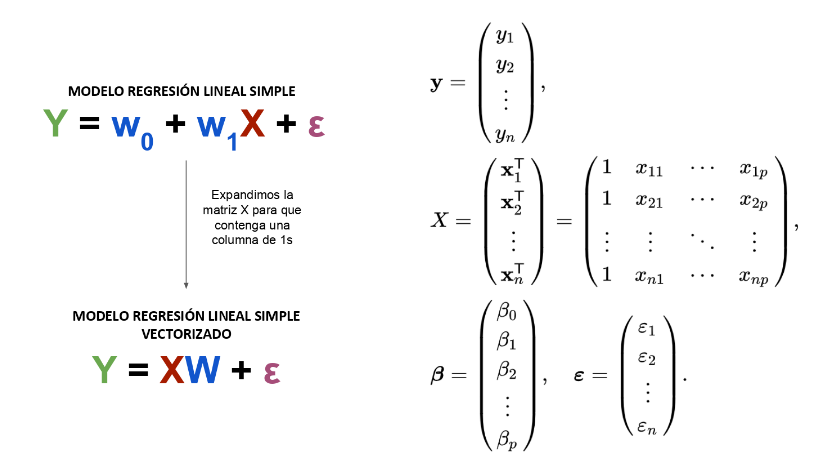

In [1]:
# Importamos la librería SKLearn, que trae bastantes funcionalidades de Machine
# Learning. Esta librería también incluye algunos datasets muy conocidos como por
# ejemplo el que vamos a utilizar hoy: El Boston Housing Dataset.
import sklearn as skl

# Importamos la función que nos carga los datos.
from sklearn.datasets import load_boston

#Importamos otras librerias que usaremos más adelante
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [2]:
# Los datos cargados desde la librería Sklearn contienen una descripción del
# dataset que estamos cargando, almacenado en el atributo DESCR.

boston_dataset = load_boston()

print(boston_dataset.DESCR)

X = boston_dataset.data
Y = boston_dataset.target

# Guardamos información de las dimensiones de nuestro dataset. 
# n = número de ejemplos que tenemos de nuestros datos
# p = número de características que tenemos de cada datos.

n, p = X.shape
print(n, p)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 1. Análisis exploratorio inicial.

Nos centraremos en modelar la relación existente entre las variables **RM** (Número medio de habitaciones) y **MEDV** (Valor medio de la vivienda). Como debe de ser ya costumbre, vamos a primero comenzar entendiendo la naturaleza de nuestros datos, realizando un análisis exploratorio preliminar.
Haremos uso de las herramientas estadísticas y matemáticas aprendidas para obtener una mejor imagen de lo que nuestros datos representan.

Intentaremos responder varias preguntas sobre el dataset:

---

1.  **¿Existe algún relación entre la variable RM y MEDV?**

2.   **¿Cúal es el precio medio de las viviendas cuyo número medio de habitaciones oscila entre 5 y 6?**

3. **¿Identificas algún fenómeno anómalo en la distribución de los datos?** 

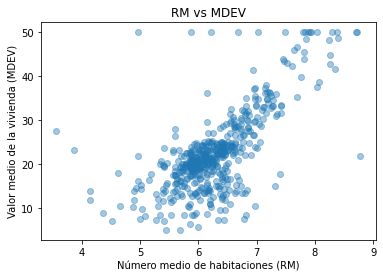

---
El coeficiente de correlación es de: 0.6953599470715393
---
El valor medio de los pisos cuyo 5 > RM > 6 es de: 17.551592356687898
---


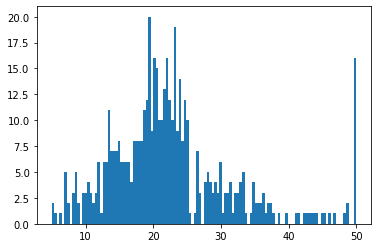

Se detecta un pico anómalo de viviendas cuyo valor medio es de 50.000$ exáctamente.
Esto es posiblemente fruto del truncamiento de aquellos valores de vivienda
superiores a esta cifra


In [3]:

# Visualización de la relación entre ambas variables.

plt.title("RM vs MDEV")
plt.xlabel("Número medio de habitaciones (RM)")
plt.ylabel("Valor medio de la vivienda (MDEV)")
plt.scatter(X[:, 5], Y, alpha=0.4)
plt.show()

print("---")
print("El coeficiente de correlación es de:", np.corrcoef(X[:, 5], Y)[0, 1])

print("---")
mask = np.logical_and(X[:,5] > 5, X[:,5] < 6)
print("El valor medio de los pisos cuyo 5 > RM > 6 es de:", np.mean(Y[mask]))

print("---")
plt.hist(Y, bins=120)
plt.show()
print('''Se detecta un pico anómalo de viviendas cuyo valor medio es de 50.000$ exáctamente.
Esto es posiblemente fruto del truncamiento de aquellos valores de vivienda
superiores a esta cifra''')

## 2. Regresión Lineal Simple - Mínimos Cuadrados Ordinarios.

Una vez hemos efectuado el análisis exploratorio inicial, vamos a proceder a implementar y entrenar a nuestro modelo. Podemos conseguir ajustar a los datos nuestra recta de regresión lineal haciendo uso de aquellos valores de los parámetros obtenidos mediante el método de ***Mínimos Cuadrados Ordinarios***. Este método encuentra que el mínimo de la función del ***Error Cuadrático Medio*** se encuentra en el punto donde su derivada es igual a 0. Esto se obtiene evaluando la siguiente expresión:

<br>
<center>$W = (X^TX)^{-1}X^TY$</center>
<br>

Para trabajar de forma vectorizada, ampliamos la matriz $X$ con una primera columna de valores asignados a $1$, que servirán para mantener al termino independiente pues... pues eso: independiente.

---

**Tareas:** 

1.   Ajustar el modelo de Regresión Lineal mediante el método de ***Mínimos Cuadrados Ordinarios***.
2.   Una vez calculados los parámetros, visualizar la recta obtenida para comprobar que realmente se ajusta a la nube de puntos.
3.   Interpretar los valores de los parámetros $w_0$ $w_1$.
4.   Utilizar el modelo entrenado para predecir cuál será el valor medio de la vivienda para un número medio de ***9 habitaciones***, y también el número de habitaciones medio que podría tener una vivienda cuyo valor medio es de **45.000\$**.
5.   Utilizar el modelo entrenado para calcular, para cada valor de $X$, cual es el valor predicho por la regresión. Llamaremos al vector generado el vector de salida predicho $Y_P$. Y evaluaremos la calidad de las predicciones implementando una función que tenga como parámetros el vector de valores de salida reáles $Y$ y el vector de salida predicho $Y_P$, y computa el ***Error Cuadrático Medio***. El ***ECM*** se calcula como:

<center>$ \operatorname{ECM}=\frac{1}{n}\sum_{i=1}^n(Y_{Pi} - Y_i)^2. $</center>
<br>


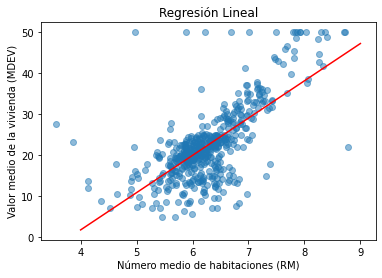

---
Valor predicho de vivienda de 3 habitaciones:  [47.24836005]
Nº medio de habitaciones de vivienda 45.000$:  [8.75298471]
---
Error Cuadrático Medio: 43.60055177116956


In [4]:

plt.title("Regresión Lineal")
plt.scatter(X[:, 5], Y, alpha=0.5)
plt.xlabel("Número medio de habitaciones (RM)")
plt.ylabel("Valor medio de la vivienda (MDEV)")

# Ampliamos X con un vector columna de 1s.
aX = np.hstack((np.ones((n,1)), X[:,5:6]))

_Y = Y[:, np.newaxis]

# Calculamos la regresión lineal por Mínimos Cuadrados Ordinarios.
W = np.linalg.inv(aX.T @ aX) @ aX.T @ _Y

# Graficamos la linea de regresión desde 2004 al 2016.
x0 = [4, 9]
plt.plot(x0, [W[0, 0] + W[1, 0] * x0[0], 
              W[0, 0] + W[1, 0] * x0[1]], 
         c="red")
plt.show()
print("---")
print("Valor predicho de vivienda de 3 habitaciones: ", [1, 9] @ W)
print("Nº medio de habitaciones de vivienda 45.000$: ", (45 - W[0])/W[1])


print("---")

Yp = aX @ W

ECM = lambda Yp, Y: np.mean(np.power(Yp - Y[:, np.newaxis], 2))
print("Error Cuadrático Medio:", ECM(Yp, Y))

## 3. Regresión Lineal Simple - Librería Sklearn.

Ahora vamos a implementar el modelo usando la librería Sklearn
---
**Tareas:** 

- Hacer uso de la función ***sklearn.linear_model.LinearRegression()*** para entrenar un modelo de Regresión Lineal Simple con las mismas variables utilizadas en el ejercicio anterior.

- Utilizar la documentación (online o usando el comando "?") para estudiar los diferentes parámetros que acepta este modelo. 

- ¿Para qué sirve el parámetro ***fit_intercept***? Entrenar el modelo con y sin dicho parámetro y visualizarlo en una gráfica.

- Una vez ajustado el modelo, comprobar que el valor de los parámetros obtenidos (también llamados coeficientes) sea el mismo que el obtenido anteriormente. De la misma forma, utilizar la función ***.predict()***, que ya viene implementada, para comprobar que tus predicciones eran correctas. 

- Finalmente, comprobar que el valor del Error Cuadrático Medio obtenido previamente en el ejercicio anterior es igual al que proporciona la función ya implementada ***sklearn.metrics.mean_squared_error()***.

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# COMIENZA TU CÓDIGO AQUÍ #

# Crea el modelo de regresión lineal.
regr = linear_model.LinearRegression()

# Entrenamos el modelo de regresión lineal.
regr.fit(X[:, 5:6], Y[:, np.newaxis])

# Utilizamos el modelo entrenado para hacer predicciones.
y_pred = regr.predict([[9]])

print(regr.coef_, regr.intercept_)
print(y_pred)
print(mean_squared_error(Y, regr.predict(X[:, 5:6])))

[[9.10210898]] [-34.67062078]
[[47.24836005]]
43.60055177116956


## 4. Regresión Lineal Múltiple.

Podemos generalizar el modelo de Regresión Lineal Simple añadiendo más variables y obteniendo así el model de Regresión Lineal Múltiple. Al añadir más variables al modelo, le estamos dotando de más información que ayude a mejorar las predicciones. Por ejemplo, un modelo de Regresión Lineal Simple podría intentar predecir la altura de una persona en base al tamaño de la mano. Pero si añadieramos otra variable, como por ejemplo, el género, podríamos tener más información para hacer predicciones más fidedignas.

A nivel de código, no hay gran diferencia entre ambos modelos, que también pueden ser resueltos mediante el método de ***Mínimos Cuadrados Ordinarios*** evaluando la expresión que ya conocemos:

<br>
<center>$W = (X^TX)^{-1}X^TY$</center>
<br>

**Tareas:** 

1. Realizar un modelo de Regresión Lineal Múltiple dónde se utilizen las variables ** RM** (Número medio de habitaciones), **LSTAT** (Porcentaje de población en el barrio clasificada como clase baja) y **PTRATIO** (Ratio de alumno-profesor del barrio).

2. Observar el valor de los coeficientes e interprétalos.

3. Utilizar el modelo de Regresión Lineal implementado por la librería **Sklearn** para entrenar este mismo modelo y comprobar que los coeficientes que has obtenidos son correctos.

4. Evaluar el modelo utilizando la función  ***sklearn.metrics.mean_squared_error()***.  y comparar el valor del error obtenido en el ejercicio 2 con el Modelo de Regresión Lineal Simple. ¿El error es mayor o menor? ¿Por qué ocurre esto?


In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# COMIENZA TU CÓDIGO AQUÍ #

# Ampliamos X con un vector columna de 1s.
aX = np.hstack((np.ones((n,1)), X[:,[5, 10, 12]]))

_Y = Y[:, np.newaxis]

# Calculamos la regresión lineal 
# por Mínimos Cuadrados Ordinarios.
W = np.linalg.inv(aX.T @ aX) @ aX.T @ _Y

print(W)

print("---")

Yp = aX @ W

ECM = lambda Yp, Y: np.mean(np.power(Yp - Y[:, np.newaxis], 2))
print("Error Cuadrático Medio:", ECM(Yp, Y))


# Crea el modelo de regresión lineal.
regr = linear_model.LinearRegression()

# Entrenamos el modelo de regresión lineal.
regr.fit(aX, Y[:, np.newaxis])

print("---")
print(regr.intercept_, regr.coef_)
print(y_pred)
print(mean_squared_error(Y, regr.predict(aX)))


[[18.56711151]
 [ 4.51542094]
 [-0.93072256]
 [-0.57180569]]
---
Error Cuadrático Medio: 27.130405758497066
---
[18.56711151] [[ 0.          4.51542094 -0.93072256 -0.57180569]]
[[47.24836005]]
27.130405758497062


Observamos que el error obtenido con la regrsión múltiple es menor que con la regresión simple

# Regresión Polinomial

## 1. Abrimos el dataset.

Ahora vamos a cargar nuestros datos desde un archivo subido desde el ordenador, cargaremos el fichero *insurance.csv*. Este archivo presenta un serie temporal que supondremos haber exportado de una de las tablas de la base de datos de nuestra empresa, donde sólo tendremos dos variables: ***Year***, el año al que hace referencia la variable y ***Av_claims***, la media de partes mensuales.

---

** Tareas **

1. Cargar el archivo *insurance.csv* en una matriz de datos. Para esto usaremos la función ***np.genfromtxt()*** de la librería ***Numpy***, aunque también podríamos ussar la librería ***Pandas***

2. Generar una gráfica donde se vea representada la evolución de ***Av_claims*** con el paso de los años.

3.  Realizar un modelo de ***Regresión Lineal Simple*** en la serie temporal para encontrar la línea recta que mejor se ajuste a los datos. Una vez tengamos el modelo entrenado, visualizar la recta y comprobar qué tal se ajusta a los datos.

4. (Bonus) Hemos insistido en que el ajuste del modelo de ***Regresión Lineal Simple*** te proporciona el valor de los parámetros cuyo valor minimiza la función del ***Error Cuadrático Medio***. Pero... ¿Y por qué creertelo cuándo ya conoces las herramientas para poder comprobarlo tu mismo? Crea una gráfica donde en el eje X se representen diferentes valores de uno de los dos parámetros (elige entre $w_0$ o $w_1$), y en el eje Y el error obtenido a través de la función de coste, cuando variamos el valor del parámetro que hemos graficado en el eje X (el valor del otro parámetro, el que no has elegido para graficar en el eje X, siempre deberá de tener un valor fijo igual al obtenido en el método de Mínimos Cuadrados Ordinarios del punto 3). Esto debería de generarte una curva parabólica cuyo punto mínimo, el mínimo del error, se produce cuando el parámetro en el eje X es igual al valor obtenido en el punto 3.

Para calcular la regresión lineal simplemente hay que evaluar la expresión siguiente:



<center> $W = (X^TX)^{-1}X^TY$ </center>



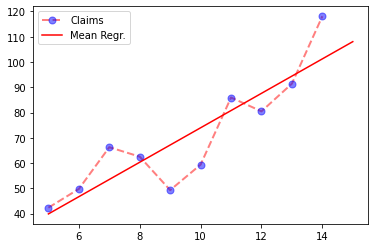

---
Bonus
[6.81878788]


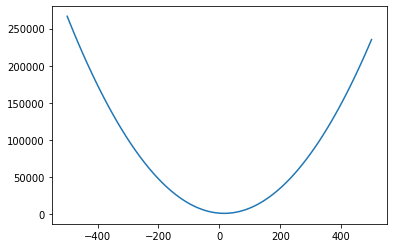

In [8]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from numpy   import genfromtxt


# Cargamos el archivo de datos, delimitado por comas, y obviando la cabecera.
data = genfromtxt("./insurance.csv", delimiter=",", skip_header=True)

n, p = data.shape

# Generamos nuestras matrices X e Y.
X = data[:,0:1]
Y = data[:,1:2]

plt.plot(data[:, 0], data[:, 1], color='red',linestyle='dashed',linewidth=2,
                                 marker='o',markersize=7,markerfacecolor='blue',
                                 markeredgecolor='blue', alpha=0.5 ,label='Claims')


# Ampliamos X con un vector columna de 1s.
aX = np.hstack((np.ones((n,1)), X))

# Calculamos la regresión lineal 
# por Mínimos Cuadrados Ordinarios.
W = np.linalg.inv(aX.T @ aX) @ aX.T @ Y

# Y generamos las predicciones de los puntos de
# la recta.
_X = np.array([[1, 5], [1, 15]])
_Y = _X @ W

plt.plot(_X[:,1], _Y, c="red", label='Mean Regr.')
plt.legend()
plt.show()

print("---")
print("Bonus")
_x = np.linspace(-500, 500, 100)

# Calculamos un vector de Errores Cuadráticos Medios.
mse = [np.square(aX @ np.array([w1, W[0,0]]) - Y).mean() for w1 in _x]

plt.plot(_x, mse)
plt.plot([W[0],W[0]], [0, 50])
print(W[1])

## 2. Regresión polinomial.

Parece que el modelo de Regresión Lineal Simple, tal cuál lo hemos planteado, no consigue capturar por completo la relación entre ambas variables. Por suerte, ya sabemos que podemos añadir una mayor flexibilidad al modelo haciendo uso de la magia de los polinomios! 

---

**Tarea:**

1. Implementar una función que tome como parámetro de entrada la matriz $X$ y un número entero que represente el **grado** del polinomio. La tarea de dicha función será la de crear una matriz de salida, cuyas columnas sean cada una de las columnas de la matriz original, elevadas a todas las potencias existentes entre 0 y el número especificado por el parámetro **grado**. Por ejemplo, si la matriz de entrada es la siguiente:

$
  X=
  \left[ {\begin{array}{cc}
   x_{11} & x_{12}\\
   x_{21} & x_{22}\\
  \end{array} } \right]
$

y el grado especificado es 3, entonces la matriz generada será:

$
  X=
  \left[ {\begin{array}{cc}
   1 & x_{11}  & x_{12} & x_{11}^2 & x_{12}^2 & x_{11}^3 & x_{12}^3 \\
   1 & x_{21} & x_{22} & x_{21}^2 & x_{22}^2 & x_{21}^3 & x_{22}^3 \\
  \end{array} } \right]
$

2. Una vez implementada la función, utilizarla para procesar la matriz $X$ con los siguientes grados $g = [1, 2, 3, 4, 5, 6]$, y ajustar el modelo para cada una de estas matrices. Conjuntamente graficar cada una de las lineas de regresión obtenidas, así como calcular el ***Error Cuadrático Medio*** para estos modelos. Para realizar estas gráficas, investigar la función **matplotlib.pyplot.subplots** para distribuir todas las gráficas en tres filas con dos gráficas en cada una.

In [9]:
def poly_matrix(X, grad):

  n, p = X.shape

  # Columna de 1s.
  Xt = np.ones((n,1))
  
  # Unimos la matriz X elevada a 
  # la potencia correspondiente.
  for g in range(grad):
    Xt = np.hstack((Xt, np.power(X, g+1)))
      
  return Xt

Grado: 0 ECM: 492.2238960000001
Grado: 1 ECM: 108.63298387878794
Grado: 2 ECM: 72.54733046969697
Grado: 3 ECM: 54.17722904195847
Grado: 4 ECM: 50.78427519230897
Grado: 5 ECM: 45.47970748716767
Grado: 6 ECM: 19.08737876618077
Grado: 7 ECM: 10.268263522401243


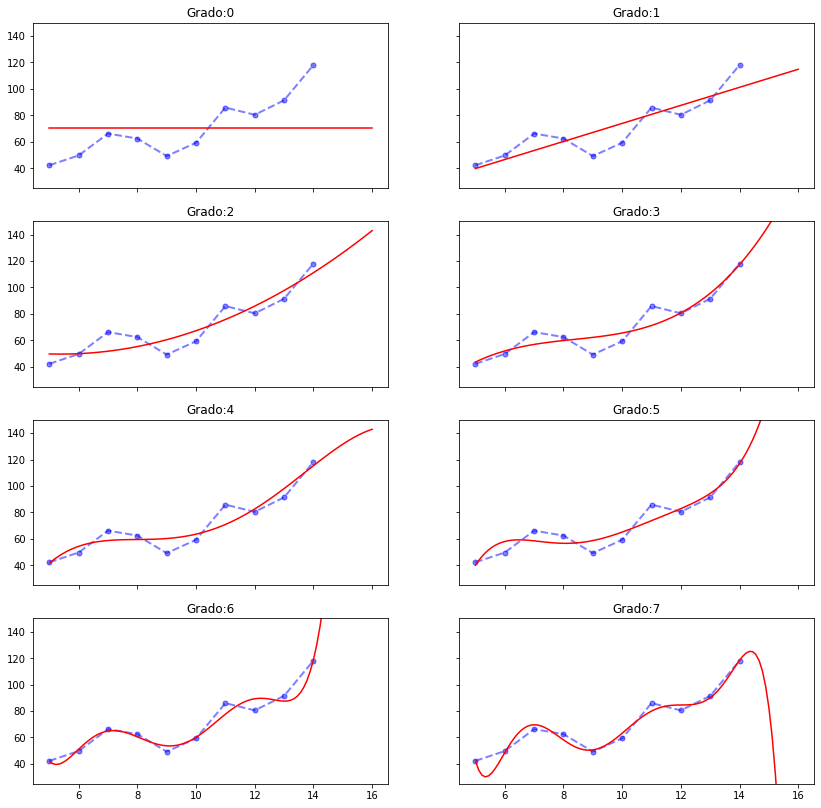

In [27]:
fig, axes = plt.subplots(4, 2, figsize=(14, 14), sharex='all', sharey='all')

g = [1,2,3,4,5,6,8,9] #Grados de la regresion polinomial
i = 0

for row in range(0,4):
  for col in range(0,2):

    aX = poly_matrix(X, i)

    # Calculamos la regresión lineal 
    # por Mínimos Cuadrados Ordinarios.
    W = np.linalg.inv(aX.T @ aX) @ aX.T @ Y

    _X = np.linspace(np.min(data[:,0]), 16, 100)[:, np.newaxis]


    axes[row, col].plot(data[:, 0], data[:, 1], color='blue',linestyle='dashed',linewidth=2,
                                      marker='o',markersize=5,markerfacecolor='blue',
                                      markeredgecolor='blue', alpha=0.5)
    plt.ylim(25, 150)

    axes[row, col].set_title("Grado:"+str(i))
    axes[row, col].plot(_X, poly_matrix(_X, i) @ W, c="red")
    
    ECM = lambda Yp, Y: np.mean(np.power(Yp - Y, 2))
    
    print("Grado:", i,"ECM:", ECM(poly_matrix(X, i) @ W, Y))

    i+=1

## 3. Regresión Polinomial - Sklearn.

---
**Tarea** : Como ya va siendo costumbre en estos ejercicios y también en casos reales, la primera vez implementamos, pero ya a la segunda: reutilizamos. Vamos a repetir el mismo análisis de **Regresión Polinomial** que hemos realizado en el ejercicio anterior, pero en esta ocasión haciendo uso de la función ***sklearn.preprocessing.PolynomialFeatures()*** de la librería ***Sklearn***. Recuerda que en este caso Sklearn transforma tu matriz $X$ para añadir coeficientes polinomiales **y también sus interacciones**, cosa que no hemos incluido en el ejercicio anterior. Por esto mismo, es de esperar que los resultados no sean iguales (por ejemplo el*** Error Cuadrático Medio***), pero no te preocupes, la calidad del análisis debe ser igual o mejor. Visualiza los modelos entrenados para cada grado de la misma forma que hicimos en el ejercicio previo (reutiliza el código).


Grado: 1 ECM: 108.63298387878785
Grado: 2 ECM: 72.54733046969696
Grado: 3 ECM: 54.17722904195789
Grado: 4 ECM: 50.78427519230741
Grado: 5 ECM: 45.47970748717825
Grado: 6 ECM: 19.08737875968999


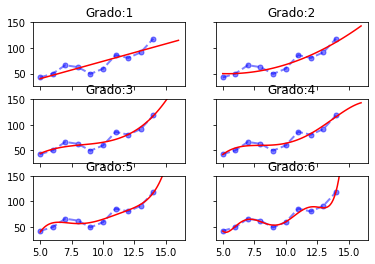

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LinearRegression

fig, axes = plt.subplots(3, 2, sharex='all', sharey='all')

for gr in range(1,7):

  poly = PolynomialFeatures(gr)
  
  # Transformamos polinomialmente a X.
  aX = poly.fit_transform(X)

  # Entrenamos el modelo de Regresión Lineal Multiple
  # con las variables polinomiales.
  lreg = LinearRegression(fit_intercept=False)
  lreg.fit(aX, Y)
  
  # Generamos matriz W y reutilizamos
  # el código del ej. anterior.
  W = np.array(lreg.coef_).T
  
  _X = np.linspace(np.min(data[:,0]), 16, 100)[:, np.newaxis]

  axs0 = [0, 0, 1, 1, 2, 2]
  axs1 = [0, 1, 0, 1, 0, 1]
  
  axes[axs0[gr-1], axs1[gr-1]].plot(data[:, 0], data[:, 1], color='blue',linestyle='dashed',linewidth=2,
                                                            marker='o',markersize=5,markerfacecolor='blue',
                                                            markeredgecolor='blue', alpha=0.5)
  
  plt.ylim(25, 150)

  axes[axs0[gr-1], axs1[gr-1]].set_title("Grado:"+str(gr))
  axes[axs0[gr-1], axs1[gr-1]].plot(_X, poly_matrix(_X, gr) @ W, c="red")
  
  ECM = lambda Yp, Y: np.mean(np.power(Yp - Y, 2))
  
  print("Grado:", gr,"ECM:", ECM(poly_matrix(X, gr) @ W, Y))

# Clasificación Logística


## 1. Análisis exploratorio.

Vamos a resolver el problema de clasificación sobre el Wisconsin Breast Cancer dataset. El dataset consiste en una lista de características de muchas células, unas son benignas y otras malignas.

El dataset está disponible en Kaggle y se puede descargar en este enlace:

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

**Tareas:**
1.  Cargar el dataset desde el archivo .csv utilizando **Pandas**  (*pd.read_csv()*) y crear la matriz de datos de entrada $X$, que contengan las variables que indiquen las propiedades de los núcleos de las células, y el vector de salida $Y$ que contiene la información de si el cancer es benigno ('B') o maligno ('M'). Puedes comprobar en *Kaggle* la información de este dataset.

2. Para el análisis de Machine Learning que vamos a utilizar, es conveniente que el vector $Y$ represente las dos posibles clases con números enteros y no letras. Transformar el contenido del vector de salida $Y$ para que contenga un 0 si el cancer es benigno y un 1 si el cancer es maligno. Puede servirte de ayuda utilizar la función ***.map()***.

3. Para analizar si existe alguna relación entre las variables, vamos a calcular la matriz de correlación a pares. Esto se puede hacer usando la función ***numpy.corrcoef***, o si el dataset es de tipo ***Panda.DataFrame*** con la función ***.corr()***. Visualizar la matriz de correlación obtenida y cuidar el estilo para que la visualización pueda ser entendida: nombres de variables en cada eje, tamaño adecuado, barra de color que indique la leyenda utilizada, etc. En este sentido quizás encuentres más cómodo usar la librería de visualización ***Seaborn*** y su función **sb.heatmap()**, que para este caso es mucho más potente.

4. Quizás para resolver un problema de Clasificación no es tan importante saber cuál es la correlación de las variables de entrada. Sin embargo, muchas de ellas pueden ser innecesarias y perjudicar al rendimiento de nuestro algoritmo a causa de lo que se conoce cómo ***La Maldición de la Dimensionalidad.*** Interpretar la matriz de correlación que has graficado en el apartado 2. ¿Qué patrones identificas?¿Qué pueden significar?

**Ojo!** Al cargar el dataset, recuerda indicar qué columna contiene los índices de tus datos, con el parámetro *index_col=* para evitar que ***Pandas*** te incluya una columna innecesaria. 

In [29]:
import numpy   as np
import scipy   as sc
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [55]:
#El parámetro index_col indica que columna contiene los índices de los datos
#Así Pandas no incluye una columna innecesaria
cancer_data = pd.read_csv("./breastcancer.csv", index_col=0)

X = cancer_data.iloc[:, 1:]
X = X.drop(columns=['Unnamed: 32'])
Y = cancer_data.iloc[:, 0].map({'M':1, 'B':0})[:, np.newaxis]

# Guardamos el nombre de las columnas.
cols = X.columns

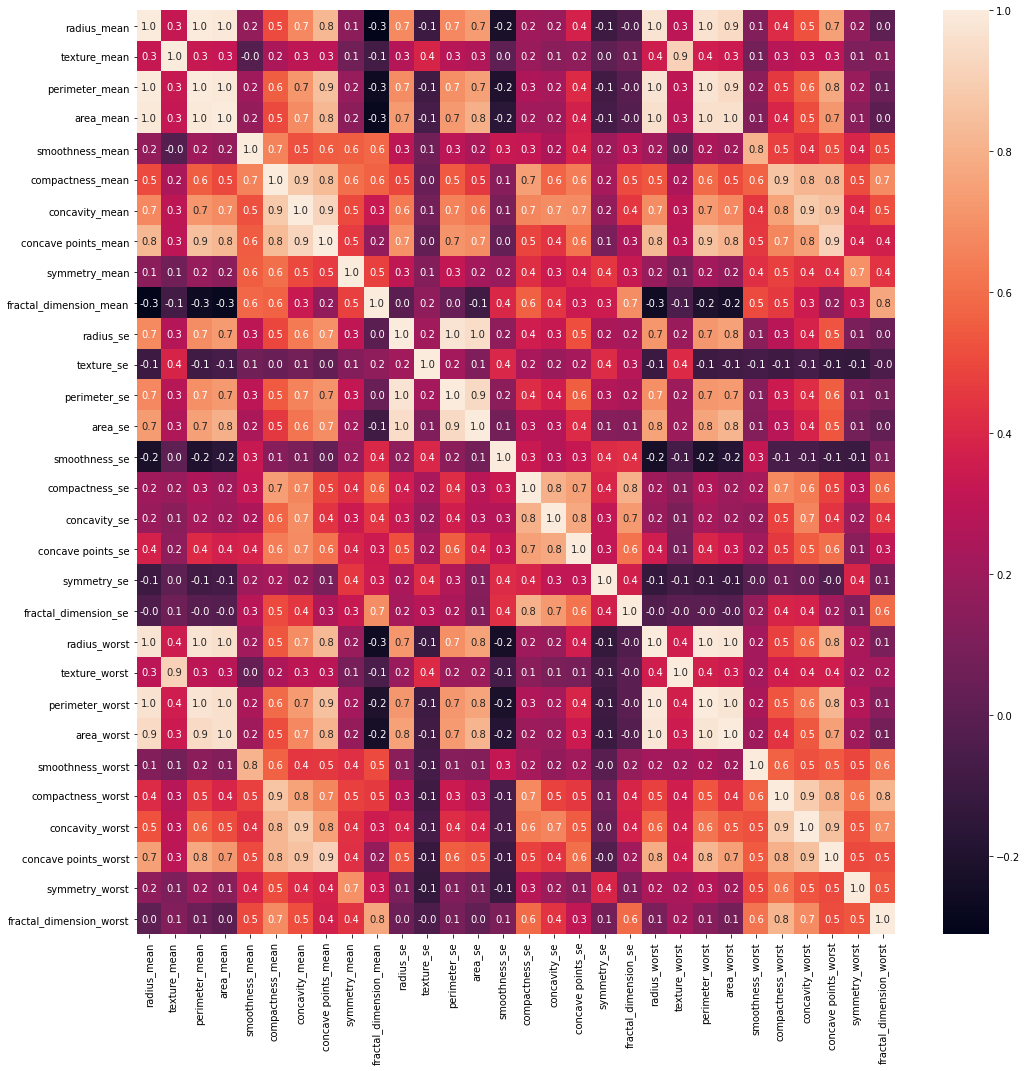

In [56]:
corr = X.corr()

# Definimos el tamaño de la graf.
plt.subplots(figsize=(17,17))

# La función heatmap de Seaborn es bastante
# útil para crear buenas matrices de corr.
sb.heatmap(corr, annot=True, fmt= '.1f',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

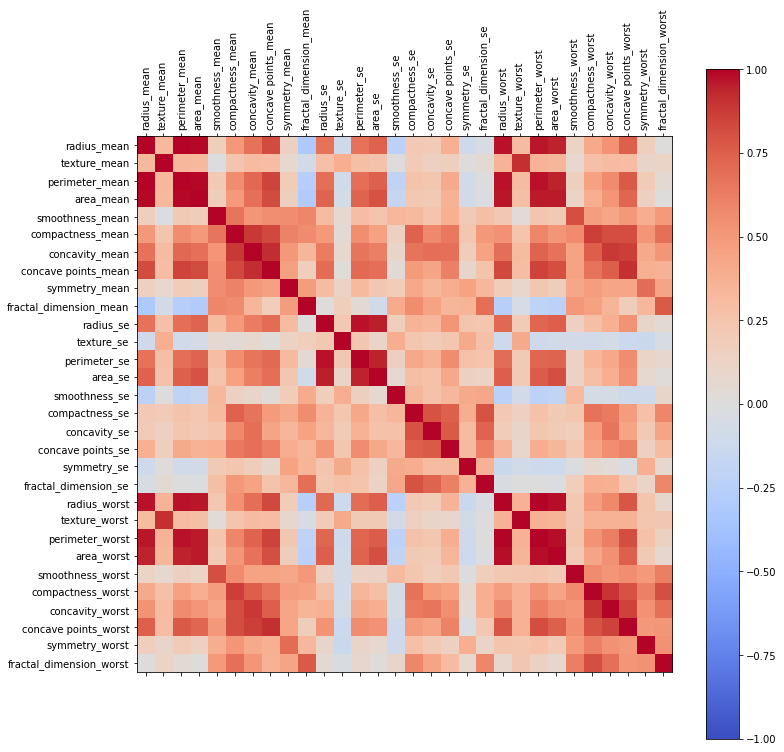

In [57]:
# Versión sólo con matplotlib.

plt.figure(figsize=(12,12))
plt.matshow(X.corr(), cmap="coolwarm", vmin=-1.0, vmax=1.0, fignum=1)

plt.grid(False)
plt.colorbar()

plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.yticks(range(len(X.columns)), X.columns)

plt.show()

## 2. Regresión Logística - (Sklearn).

---

**Tareas:**

1. Implementar la función de error ***LogLoss***. Esta función deberá de tomar dos parámetros de entrada $Y$ e $Y_p$ y deberá de devolver el resultado de calcular dicha función de error. Una vez mplementada, realizar gráficas para valores fijos de $Y={0, 0.5, 1}$ donde se pueda comprobar cuál es el error asignado a cada una de las predicciones en el rango de 0-1. Es decir, graficaremos en el eje X los valores de $Y_p$ y en el eje Y los valores de la función de error.

**Extra** Superponer a cada una de las gráficas la función de error del MSE y comparar las diferencias.

2.  Para medir la capacidad de nuestro modelo de poder generalizar sus predicciones y controlar la aparición de ***overfitting***, una manera sencilla (y frecuentemente utilizada), es la de dividir de manera aleatoria tu conjunto de datos en un *dataset de entrenamiento*, con el que se ajusta el modelo, y un *dataset de prueba*, con el que se evalua el modelo. Aquí se comprueba si el modelo generaliza o no, puesto que los datos con los que evaluamos nunca antes ha sido visto por el modelo durante el entrenamiento. En este sentido, utilizar la función ***sklearn.train_test_split()*** para que genere aleatoriamente un conjunto de datos de entrenamiento y de validación. Buscar la manera para que el tamaño de los conjuntos de datos train/test sea de 70%/30%.

3. Utilizar el modelo de Regresión Logística implementado en Sklearn (***sklearn.linear_model.LogisticRegression()***) para elaborar un modelo clasificador binario que utilize tus variables de entrada $X$ para predecir si las celulas identificadas son *Benignas* o *Malignas*. Entrenar a tu modelo con el conjunto de datos de entrenamiento generados en el *ejercicio 1* y validarlo usando la función ***score()*** sobre el conjunto de datos de validación. Tienes toda la libertad para seleccionar las variables de entrada que consideres más importantes, muchas o pocas, y de preprocesarlas como creas razonable.

** Importante:** Fíjate que una vez obtienes un modelo entrenado y lo evaluas con la función ***score()***, cada vez que ejecutes la celda de nuevo, comprobarás que este valor irá cambiando. Esto se produce porque estamos generando una partición aleatoria train/test nueva cada vez que ejecutamos la celda, y por tanto, el rendimiento del modelo va variando. 

Sin embargo, añadiremos el atributo *random_state=0* a la función *train_test_split()* para eliminar esa aleatoriedad y trabajar con las mismas particiones (OJO! esto no sería una buena práctica en ML)

In [35]:
from sklearn import linear_model,model_selection,preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import random
from math import log

import sklearn

In [36]:
from sklearn.datasets        import load_iris
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split

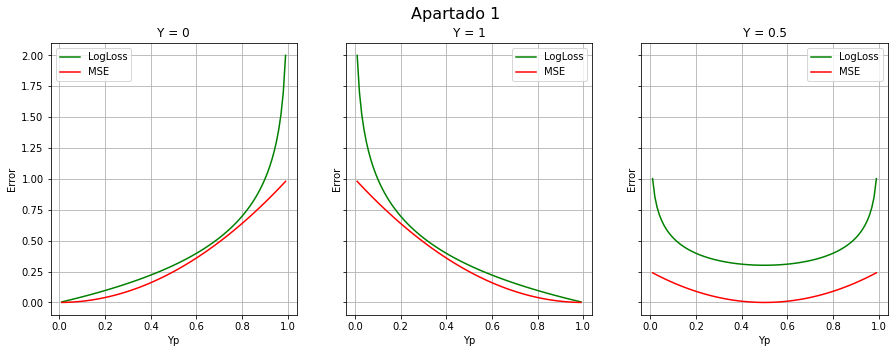

In [75]:
#Apartado 1 - LogLoss

yp = np.arange(0.01,1, step = 0.01) #Array con las predicciones
y0 = np.zeros(len(yp), dtype=int)   #Arrays con los valores fijos de Y
y1 = np.ones(len(yp), dtype=int)    #y1 = y0 + 1
y5 = np.full((len(yp)), 0.5)        #y5 = y0 + 0.5

def logloss(y, yp):
  return -(y*np.log10(yp) + (1-y)*np.log10(1-yp))

mse0 = np.zeros((len(yp))) 
mse1 = np.zeros((len(yp))) 
mse5 = np.zeros((len(yp))) 

for i in range(len(yp)):  
  mse0[i] = skl.metrics.mean_squared_error([0], [yp[i]])
for i in range(len(yp)):  
  mse1[i] = skl.metrics.mean_squared_error([1], [yp[i]])
for i in range(len(yp)):  
  mse5[i] = skl.metrics.mean_squared_error([0.5], [yp[i]])


fig, axs = plt.subplots(1, 3, figsize=(15,5), sharey='all')
fig.suptitle('Apartado 1', fontsize=16)

axs[0].plot(yp, logloss(y0, yp), c='g', label='LogLoss')
axs[0].plot(yp, mse0, c='r', label='MSE')
axs[0].set_title('Y = 0')
axs[0].set_xlabel('Yp')
axs[0].set_ylabel('Error')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(yp, logloss(y1, yp), c='g', label='LogLoss')
axs[1].plot(yp, mse1, c='r', label='MSE')
axs[1].set_title('Y = 1')
axs[1].set_xlabel('Yp')
axs[1].set_ylabel('Error')
axs[1].grid(True)
axs[1].legend()

axs[2].plot(yp, logloss(y5, yp), c='g', label='LogLoss')
axs[2].plot(yp, mse5, c='r', label='MSE')
axs[2].set_title('Y = 0.5')
axs[2].set_xlabel('Yp')
axs[2].set_ylabel('Error')
axs[2].grid(True)
axs[2].legend()


In [83]:
# Entrenamiento sin preprocesamiento.

l1 = []

for i in range(250):
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.preprocessing import scale

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y.ravel(), test_size=0.3)
  clf  = LogisticRegression().fit(X_train, Y_train)

  l1.append(clf.score(X_test, Y_test))
  
np.mean(l1)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9437894736842105

In [84]:
# Entrenamiento con variables polinomiales.

l2 = []

for i in range(250):
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.preprocessing import scale

  X_train, X_test, Y_train, Y_test = train_test_split(PolynomialFeatures(2).fit_transform(X), Y.ravel(), test_size=0.3)
  clf  = LogisticRegression().fit(X_train, Y_train)

  l2.append(clf.score(X_test, Y_test))
  
np.mean(l2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9503157894736841

In [78]:
# Entrenamiento con Scaling.

l3 = []

for i in range(250):
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.preprocessing import scale

  X_train, X_test, Y_train, Y_test = train_test_split(scale(X, with_mean=True, with_std=True), Y.ravel(), test_size=0.3)
  clf  = LogisticRegression().fit(X_train, Y_train)

  l3.append(clf.score(X_test, Y_test))
  
np.mean(l3)

0.9769356725146198

In [79]:
# Entrenamiento con variables polinomiales + Scaling

l4 = []

for i in range(250):
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.preprocessing import scale

  X_train, X_test, Y_train, Y_test = train_test_split(PolynomialFeatures(2).fit_transform(scale(X, with_mean=True, with_std=True)), Y.ravel(), test_size=0.3)
  clf  = LogisticRegression().fit(X_train, Y_train)

  l4.append(clf.score(X_test, Y_test))
  
np.mean(l4)

0.9621754385964911

In [80]:
# Entrenamiento con variables polinomiales + Scaling + PCA

l5 = []

for i in range(250):
  
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.preprocessing import scale
  from sklearn.decomposition import PCA

  pca = PCA(n_components=25)
   
  X_train, X_test, Y_train, Y_test = train_test_split(pca.fit_transform(scale(X, with_mean=True, with_std=True)), Y.ravel(), test_size=0.3)
    
  clf  = LogisticRegression().fit(X_train, Y_train)

  l5.append(clf.score(X_test, Y_test))
  
np.mean(l5)

0.9767953216374269

In [85]:
print("Básico: ", np.mean(l1))
print("Polinomiales: ", np.mean(l2))
print("Scaled: ", np.mean(l3))
print("Pl + Sc.: ", np.mean(l4))
print("Pl + Sc + PCA: ",  np.mean(l5))

Básico:  0.9437894736842105
Polinomiales:  0.9503157894736841
Scaled:  0.9769356725146198
Pl + Sc.:  0.9621754385964911
Pl + Sc + PCA:  0.9767953216374269
